# Chapter 2 - 필드(Field)

- 필드는 **덧셈과 곱셈** 연산값이 정의도ㅚ는 값들의 컬렉션이다.

# 2.1 복소수에 대한 소개

- -1의 제곱은 $i^2=-1$로 정의된다.
- 임의의 양수 b에 대해 $x^2=-b$의 해는 $\sqrt b \times i$이다.
- 실수와 $i$의 곱은 *허수(imaginary number)*라고 한다.
- 복소수는 실수부(real part)와 허수부(imaginary part)를 갖는다.

# 2.2 파이썬에서의 복소수

- 파이썬은 복소수를 지원한다. -9의 제곱근인 허수 **3i**는 **3j**라고 쓴다.

In [1]:
3j

3j

- -1의 제곱근은 1j로 쓴다.

In [2]:
j

NameError: name 'j' is not defined

In [3]:
1j

1j

- 파이썬에서 실수와 허수를 더하기 위해 +를 사용할 수 있다.

In [4]:
1+3j

(1+3j)

- 연산자 +, -, *, /, ***를 지원한다.

In [5]:
(1+3j) + (10+20j)

(11+23j)

In [6]:
x = 1 + 3j
(x-1)**2

(-9+0j)

In [7]:
1+2j*3

(1+6j)

In [8]:
4*3j**2

(-36+0j)

- 복소수의 실수부와 허수부를 도트 표기법을 사용하여 구할 수 있다.

In [9]:
x.real

1.0

In [10]:
x.imag

3.0

In [11]:
type(1+2j)

complex

# 2.3 필드의 추상화

- 개념, thorem, 프로시저를 산술 연산자 +, -, *, /에 대해 기술한다.
- 이들 연산자는 교환법칙(a+b=b+a)와 결합법칙(a(b+c)=ab+ac)과 같은 기본 법칙만을 만족하다고 가정한다.
- 개념, therom, 프소시저는 이들 기본 법칙에만 의존하므로, 필드라 불리는 임의의 수 체계에 적용할 수 있다.
- 객체지향 프로그래밍에 대해 알고 있는 사람에게 필드는 산술 연산자들을 위한 메서들을 가져야 하는 어떤 인터페이스를 만족하는 클래스와 비슷하다.
- 이 책에서는 세 개의 필드를 가지고 선형대수학의 보편성(generality)을 보여준다.
 - $\mathbb R$
 - $\mathbb C$
 - $GF(2), 0과 1로 이루어진 필드
- 나숫셈 연산자는 곱센 연산자의 역이고, 뺄셈 연산자는 덧셈 연산자의 역이다.

In [12]:
def solve1(a, b, c): return (c-b)/a

solve1(10, 5, 30)

2.5

In [13]:
solve1(10+5j, 5, 20)

(1.2-0.6j)

# 2.4 복소수 필드 $\mathbb C$ 다루기

- 각 복소수는 z의 두 개의 빌반적인 수 z.real, z.imag로 이루어진다. 그러므로 전통적으로 z는 평면(복소 평면)위의 어떤 점, 위치를 명시한다고 생각한다.

### Task 2.4.1
복소 평면에 점을 그리는 plotting모듈이 제공된다. 이 모듈은 프로시서, plot을 정듸한다. 모듈에서 클래스를 임포트하고 S의 점들을 그려보자.

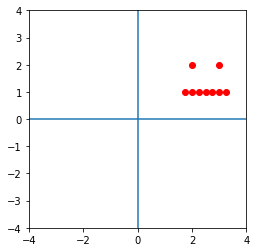

In [45]:
from plotting_matplotlib import plot

S = {2+2j, 3+2j, 1.75+1j, 2+1j, 2.25+1j, 2.5+1j, 2.75+1j, 3+1j, 3.25+1j}
plot(S, 4)

## 2.4.1 복소수의 절대값

- 복소수 z의 절대값은 |z|로 쓰며(파이썬에서는 abs(z)로 표현), 복소 평면의 **원점에서 대응하는 점**까지의 거리를 말한다.
$$|z|^2 = (z.real)^2+(z.imag)^2$$

In [17]:
abs(3+4j)

5.0

In [18]:
abs(1+1j)

1.4142135623730951

### Definition 2.4.2
- 복소수 z의 공액 복소수(복소컬레)는 $\overline z$로 쓰며, z.real-z.imag로 정의된다.

In [19]:
(3+4j).conjugate()

(3-4j)

- $i^2=-1$이란 사실을 사용하여 z와 $\overline z$로 표현되는 $|z|^2$에 대한 식을 얻을 수 있다.
$$|z|^2=z\circ\overline z$$

## 2.4.2 복소수 덕셈하기(Translation)

- 덧셈에 의한 변환을 평행이동(translation)이라고 부른다. 평행이동은 다음 형태를 가진다.
$$f(z)=z_0+z$$

### Task 2.4.3
컴프리헨션을 사용하여 새로운 그래프를 생성해 보자. 이 그래프는 S의 원소 각각에 1+2i를 더하여 얻어진 점들의 집합을 제공한다.

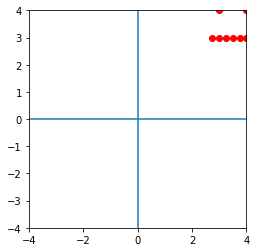

In [22]:
plot({1+2j + s for s in S}, 4)

### Quiz 2.4.4 
복소수의 집합 S의 'left eye'는 2+2i에 위치해 있다. $f(z)=z_0+z$에 의해 'left eye'를 원점으로 평행이동하는 $z_0$의 값은 무엇인가?

A) $z_0+z=0$

$\quad z_0=-z$

$\quad z_0=-2-2i$

### Problem 2.4.5
서로 다른 임의의 두 점 $z_1, z_2$에 대해 다음을 보여라.
- $z_1을 z_2$로 매핑하는 평행이동이 있다.
- $z_2을 z_1$으로 매핑하는 평행이동이 있다.
- $z_1을 z_2$로, 그리고 $z_2를 z_1$으로 둘다 매핑하는 평행이동은 없다.

A)
- $z_2 = z_1 - z_1 + z_2$
- $z_1 = z_2 - z_2 + z_1$
- $z_1 - z_1 + z_2 != z_2 - z_2 + z_1$

### 복소수를 화살표로 나타내기
- 평행이동 f(z)를 화살표로 보여 주는 것은 도움이 된다.
- 화살표의 꼬리는 복소 평면의 임의의 점 z에 위치하고 화살표의 머리는 z가 이동한 점 f(z)에 위치한다.
- 평행이동은 $f(z)=z_0+z$형태를 가지므로, 평행이동은 z$_0$에 의해 표현된다. 

### Problem 2.4.6
두 개의 화살표를 사용하여 복소수 $z_0=-3+3i$를 나타내는 그림을 그려보다. 이때, 화살표의 두꼬리를 서로 다은 점에 위치한다.

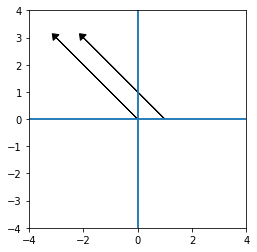

In [27]:
from plotting_matplotlib import plot_arrow

plot_arrow(-3+3j, 0+0j, show=False)
plot_arrow(-3+3j, 1+0j)

### 평행이동 합성하기, 화살표 더하기
- $f_1(z)=z_1+z$와 $f_2(z)=z_2+z$를 두 개의 평행이동이라고 하면, $z\mapsto (z_2+z_1)+z$에 의해 정의되는 또 다른 평행이동이 만들어진다.

$(f_2\circ f_1)(z) = f_2(f_1(z))$

$\quad \quad \quad \quad = f_2(z_1+z)$

$\quad \quad \quad \quad = z_2+ z_1+z$

## 2.4.3 양의 실수로 복소수 곱하기(Scaling)

- 양의 실수로 복소수에 곱하는 연산을 스케일링(scaling)이라고 하고, 이는 복소수의 크기의 변경을 가져온다.

### Task 2.4.7
Task 2.4.3의 컴프리헨션을 사용하여 'My scaled points'라는 이름의 새로운 그래프를 생성해 보자. 새로운 그래프의 점들은 S의 각 복소수를 이등분한 것이다.

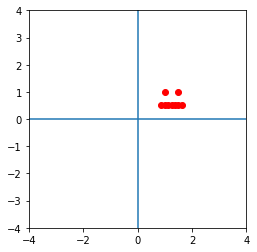

In [9]:
plot({0.5*s for s in S})

## 2.4.4 음수로 복소수 곱하기 : 180도 회전

- 복소수에 -1를 곱하면 180도 회전한 변화를 가져온다.

## 2.4.5 i를 곱하기: 90도 회전

- 90도 회전을 하는 방법은 (x,y)에 위치한 점을 (-y, x)로 움직이는 것이다. 
- $x+iy$에 $i$를 곱하면 90도 회전된다.

$\quad h(z)=i\circ z$

$\quad \quad \quad = ix +i^2y$

$\quad \quad \quad= ix - y$



### Task 2.4.8
'Rotated and scaled'라는 새로운 그래프를 생성해 보자. 이 그래프는 S의 점들을 90도 회전하고 1/2만큼 스케일링한 것이다. 컴프리헨션을 사용하여 S의 점들을 하나의 복소수와 곱해 보자.

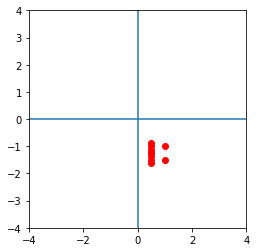

In [12]:
plot({-0.5j*s  for s in S})

### Task 2.4.9
컴프리헨션을 사용하여 새로운 그래프를 생성해 보자. 이 그래프는 S의 점들을 90도 회전하고 1/2만큼 스케일링 한 후, 다시 아래쪽으로 1칸 그리고 오른쪽으로 2칸 이동한 것이다. 컴프리헨션을 사용하여 S의 점들을 하나의 복소수와 곱하고 다른 복소수에 더해 보자.

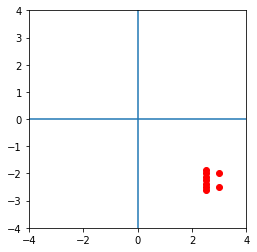

In [16]:
plot({-0.5j*s + (2-1j) for s in S})

### Task 2.4.10
image 이미지 모듈이 제공된다. 이를 이용해서 컴프리헨션을 사용하여 리스트 pts에 복소수 x+yi의 집합을 항당해 보자. 이때 픽셀(x,y)의 이미지 밝기는 120보다 작다. 리스트 pts를 그려보자.

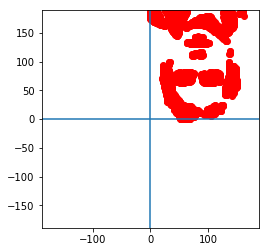

In [40]:
from image import file2image
from image import color2gray

img = file2image('img01.png')
img = color2gray(img)

height, width = len(img), len(img[0])
pts = [x+y*1j for y in range(height) for x in range(width) if img[y][x] < 120]
plot(pts, height)

### Task 2.4.11
파이썬 프로시저 f(z)를 작성해 보자. 이 프로시저는 리스트 S의 점들을 원점에 중심을 둔 점들의 집합이 되게 평행이동한다. 결과값이 평행이동된 점들의 집합이 되게 S와 f에 대한 컴프리헨션을 작성해 보자. 그리고 결과값을 그래프로 그려 보자.

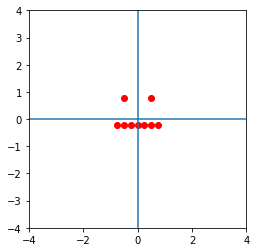

In [38]:
def f(Z):
    center = sum(Z) / len(Z)
    return {z-center for z in Z}

plot(f(S))

### Task 2.4.12
S의 점들 대신 pts의 점들을 가지고 Task 2.4.8을 반복해 보자.

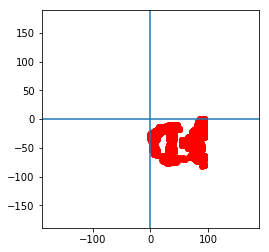

In [42]:
plot({-0.5j*pt  for pt in pts}, height)

## 2.4.6 복소 평면의 단위원: 편각과 각도

- 복소수의 곱에 의해 어떤한 회전도 표현 가능하다.
- 회전 각도의 측도로 각도(angle)대신 *라디안(radinan)*을 사용하는것이 편리하다.

### 단위원 위에 있는 복소수의 편각(angle of deviation)
- 단윈원은 복소 평면의 원점에 중심을 둔 반지름이 1인 원이다.
- 원위의 점 z는 워느이 가장 오른쪽 점인 1+0i에서 시작하여 z에 도착할 때깢의 원을 따라 반시계 방향으로 이동하는 거리로 표현된다. 이런한 거리를 z의 *편각*이라 한다.

### Example 2.4.13
- 단위원의 둘레는 $2\pi$이므로, 원의 절반에 해당하는 점의 편각은 $\pi$이고 1/8에 해당하는 점의 편각은 $\pi/4$이다.

### 단위원 위의 두 복소수에 의해 형성된 각도
- 단위원 위의 두 점 $z_1, z_2$까지의 선분에 의해 형성된 각도에 숫자를 할당할 수 있다. 
- 이 각도는 라디안으로 표현되며, $z_2$에서 $z_1$까지 반시계 방향으로 원을 따라 이동한 거리이다.

### Example 2.4.11
$z_1$은 편각이 $\frac{5}{16}\pi$인 원위의 점이고 $z_2$는 편각이 $\frac{3}{16}\pi$인 원위의 점이라고 하자. 그러면, $z_2$에서 시작하여 원을 따라 반시계 방향으로 이동해야 하는 거리는 $\frac{1}{8}\pi$이다. 따라서, $\frac{1}{8}\pi$는 원점-$z_1$선분과 원점-$z_2$ 선분 사이의 각도이다.

### Remark 
- z의 편각은 z와 1+0i에 의해 형성된 각이다.

##  2.4.7 오일러 공식

- 오일러 공식은 임의의 실수 $\theta$에 대해, $e^{i\cdot \theta}$는 편각이 $\theta$인 단인원 위의 점 z라는 것을 의미한다.
- 여기서, e는 잘 알여진 초월수(transcendental number) 2.718281828...이다.

### Example 2.4.16
점 -1+0i의 편각은 $\pi$이다. $\pi$를 오일러 공식에 대입하면, 식 $e^{i\cdot \pi}+1=0$을 얻는다.

### Task 2.4.17
math 모듈로부터 e와 pi의 정의를 임포트하자. n는 정수 20이라 하고, w는 복소수 $e^{2\pi i/n}$이라 하자. $w^0, w^1, w^2, ..., w^{n-1}$로 이루어진 리스트를 생성하는 컴프리헨션을 작성해 보자. 그리고 이 복소수들을 그래프로 그려보자.

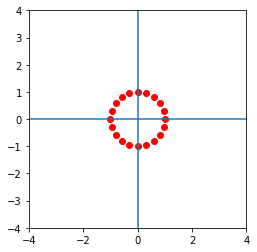

In [50]:
from math import e, pi

n = 20
w = e**(2*pi*1j/n)
plot([w**x for x in range(n)])

## 2.4.8 복소수에 대한 극좌표 표현

- 오일러 공식은 단위원 위에 았는 복소수를 쉽게 표현할 수 있는 방법을 제시한다.
- L을 원점에서 임의의 복소수 z까지의 복소 평면 위에 있는 선분이라고 하고, z'은 선분이 단위원고 교차하는 점이라고 하자.
- r은 z까지의 선분의 길이라고 하자. z'은 z를 축소한 것이라고 보면, 다음과 같이 쓸수 있다.

$$z'=\frac{1}{r}z$$

- $\theta$를 z'의 편각이라 핮. 오일러 공식에 의하면, $z'=e^{\theta i}$이다. 따라서 다음을 얻는다.

$$z=re^{\theta i}$$

- 여기서, r과 $\theta$는 z의 극좌표이다. 복소수에서 z의 편각은 $\theta$라고 정의하고, z의 절대값(|z|)은 r이라고 정의한다.

## 2.4.9 첫 번째 지수 법칙

- 지수에 대한 곱은 그 지수들을 더하면 된다.

$$e^ue^v=e^{u+v}$$

## 2.4.10 $\tau$ 라디언 회전

- $\tau$만큼 회전한 z는 $z=re^{(\theta+\tau) i}$이다. 이값을 z로 부터 어떻게 구할까?

$re^{(\theta+\tau) i} = re^{\theta} re^{\tau i}$

$\quad \quad \quad =zre^{\tau i}$

- 따라서 $\tau$만큼 회전한 것을 나타내는 함수는 단순히 다음과 같이 쓸 수 있다.

$$f(z)=ze^{\tau i}$$

### Task 2.4.18
Task 2.4.1의 복소수로 이루어진 집합 S를 기억해 보자. S의 원소들을 $\pi/4$만틈 회전한 것으로 이루어진 집합을 반환하는 컴프리헨션을 작성해 보자. 이 컴프리헨션의 값을 그래프로 그려보자.

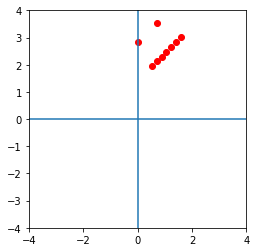

In [52]:
plot({s*e**((pi/4)*1j) for s in S})

### Task 2.4.19
마찬가지로, Task 2.4.10을 기억해 보자. Task 2.4.18을 pts에 적용해보자.

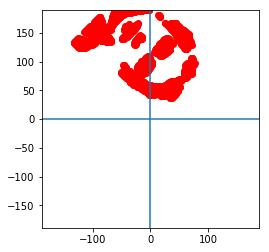

In [59]:
plot({pt*e**((pi/4)*1j) for pt in pts}, height)

## 2.4.11 연산 결합히기

- 복소수는 필드를 형성하므로, 익숙한 대수적 규칙들을 사용할 수 있다.
- 예들 들어, $a\cdot(b\cdot z)=(a\cdot b)\cdot z$이 규칙을 사용할 수 있다.
- 스케일링과 회전 둘 다 곱셈으로 이루어지므로, 회전과 스케일을 결합할 수 있다.

### Task 2.4.20
집합 pts를 변환하는 컴프리헨션을 작성해 보자. 이변환은 이미지가 중심에 위치하도록 평행이동하고, $\pi/4$만틈 회전하며, 그 다음에 1/2만큼 스케일링한다. 결과를 그래프로 그려보자.

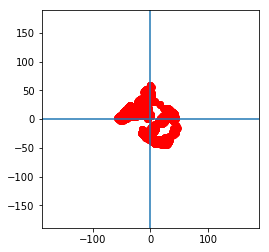

In [61]:
plot([((e**(pi/4*1j))/2)*pt for pt in f(pts)], height)

## 2.4.12 3차원 이상의 경우

- 복소수는 이미지, 조금 더 일반적으로 말하면 평면 위의 점들으 집합을 변환하는 데 아주 편리핟.
- 아마도 3차원 이상의 점들에 대한 연산에 동일한 방식을 적용할 수 있는지 궁금할 것이다.
- 하지만, 이것에 대해서는 다음 장 벡터에서 살펴본다.

# 2.5 GF(2)에 대해 알아보기

- GF(2)는 갈루아 필드(Galois Field 2)를 간략하게 표현한 것이다.
- 덧셈은 modulo 2이며, 이것은 배타적 논리합(xor)과 같이다. 특히, 1+1=0이다.
- 뺄셈은 덧셈과 동일하다. 1의 음수는 1이고, 0의 음수는 0
- 곱셈은 일반적인 0과 1의 곱셈과 같다. 0을 곱하면 0이되고, 1에 1을 곱하면 1이된다.
- 나눗셈의 경우 1로 나눌 는 있지만 0으로 나눌수는 없다(일반 산술 연산과 동일함).


In [62]:
from GF2 import one

In [63]:
one*one

one

In [64]:
one*0

0

In [65]:
one+0

one

In [66]:
one+one

0

In [67]:
-one

one

## 2.5.1 완벽한 비밀 유지 - 다시 방문

- 암호화 함수를 사용하여 평문의 비트 p를 암호문의 비트 c로 변환한다.
- 각 평문 $p\in GF(2)$에 대해, 함수 $k\mapsto k+p$(GF(2)에서 GF(2)로의 매핑)는 가역적이다(단산이며 전사 함수임).
- 그러므로 키 k가 균등하고 랜덤하게 선택될때, 암호문도 균등 분포를 가진다.

### GF(2) 대신 정수 사용하기
- GF(2) 대신에 일반적인 정수를 사용할 수 없을까?
- 각 $x\in\mathbb Z$에 대해 $\mathbb Z$에서 $\mathbb Z$로의 매핑인 함수 $y\mapsto x+y$가 가역함수인 것은 마찬가지다.
- 하지만, 이것이 암호체계로서 동작하지 않는 이유는 $\mathbb Z$에 대해 *균등 분포가 없어 첫 번째 단계인 키를 선택하는 것이 불가능*하기 때문이다.

### 긴 메시지 암호화하기
- 긴 메히지는 긴 비트열로 나타낼 수 있음을 안다.

### 일회성 패드(one-time pad)
- 긴 메시지 암호화하기에서 기술한 암호체계는 *일회성 패드*라고 불린다. 
- 이름에서 제안되듯이 키의 각 비트는 오직 한번만 사용된다는 것이 중요하다.
- 즉, 평문의 각 비트는 그 키의 행당 비트를 가지고 암호화된다.

### Problem 2.5.1
11-심볼 메시지를 다음과 같이 암호화하였다고 생각하자. 각 심볼은 0과 26사이의 숫자에 의해 표현된다(A$\rightarrow$0, B$\rightarrow$1, ..., Z$\rightarrow$25, space$\rightarrow$26). 각 숫자는 5-비트 이진 시퀀스(0$\rightarrow$00000, 1$\rightarrow$00001, ..., 26$\rightarrow$11010)에 의해 표현된다. 마지막, 55비트의 결과 시퀀스는 결함이 있는 일회성 패드를 사용하여 암호화 된다. 키는 55개의 랜덤 비트가 아니라 5개 랜덤 비트로 구성된 동일한 시퀀스를 11번 복사한 것이다. 암호문은 다음과 같다.

10101, 00100, 10101, 01011, 11001, 00011, 01011, 10101 , 00100, 11001, 11010

평문을 찾아보자.

In [84]:
def make_keylist(): return [format(n, '05b') for n in range(27)]

def xor_bin(bin1, bin2):
    rst = ''
    
    for idx in range(5):
        rst += '1' if bin1[idx] != bin2[idx] else '0'      
    return rst

def bin2alp(bin):
    dec = sum([int(bin[idx])*(2**(4 - idx)) for idx in range(5)])
    alp = chr(dec + 65) if dec <= 25 else ' ' if dec == 26  else '!'
    return alp

def cha2str(char_list):
    str_list = []
    str = ''
    for idx, char in enumerate(char_list):
        str += char
        if((idx+1) % 11 == 0):
            str_list.append(str)
            str = ''           
    return str_list
            
clist = ['10101', '00100', '10101', '01011', '11001', '00011', '01011', '10101', '00100', '11001', '11010']

keylist = make_keylist()
plist = [xor_bin(c, key) for key in keylist for c in clist]
alp_plist = [bin2alp(bin) for bin in plist]
cha2str(alp_plist)

#EVE IS EVIL

['VEVLZDLVEZ ',
 'UFUKYCKUFY!',
 'XGXJ!BJXG!Y',
 'WHWI AIWH Z',
 'RARP!HPRA!!',
 'QBQO!GOQB!!',
 'TCTN!FNTC!!',
 'SDSM!EMSD!!',
 '!M!DRLD!MRS',
 '!N!CQKC!NQT',
 '!O!BTJB!OTQ',
 '!P!ASIA!PSR',
 'ZIZHVPHZIVW',
 'YJYGUOGYJUX',
 '!K!FXNF!KXU',
 ' L EWME LWV',
 'FUF!JT!FUJK',
 'EVE IS EVIL',
 'HWHZLRZHWLI',
 'GXGYKQYGXKJ',
 'BQB!NX!BQNO',
 'ARA!MW!ARMP',
 'DSD!PV!DSPM',
 'CTC!OU!CTON',
 'N!NTB!TN!BC',
 'M!MSA SM!AD',
 'P!PRDZRP!DA']

### 2.5.2 네트워크 코딩(Network coding)

- 한 가운데 노트에 비트 $b_1, b_2$가 도착하면 두 비트는 GF(2) 덧셈으로 결합하여 하나의 비트가 된다.
- 사용자 c는 비트 $b_1, b_1+b_2$를 수신하며 $b_2$를 계산할 수 있다. 사용자 d도 마찬가지다.
- 예에서, 네트워크는 한 쌍의 사용자에게 단지 1Mbps의 스트링을 지원하는 것처럼 보이지만 실제로는 2Mbps 스트리밍을 지운한다.
- 물론, 이런 방식의 라우팅은 더 큰 네트워크와 더 많은 사용자에게도 적용될 수 있다.
- 이런 개념을 *네트워크 코딩*이라 한다.

# 2.6 Review questions

### Q) 필드 이름 3개를 말해보자

- $\mathbb R$ (실수 필드)
- $\mathbb C$ (복소수 필드)
- $GF(2)$ (갈루아 필드 2)

### Q) 복소수의 공액 복소수는 무엇인가? 이것은 복소수의 절대값과 무슨 관계가 있는가?

- z.real+z.imag의 conjugate는 z.real-z.image 이다.
- 복소수의 절대값은 공액 복소수를 곱해서 얻을 수 있다.
$$|z|=z\cdot\overline z$$

### Q) 복소수의 덧셈은 어떻게 동작하는가?
- real 부분은 real 부분낄, image 부분은 image끼리 더한다.
- $z_1+z_2=(z_1.real+z_2.real) + (z_1.imag + z_2.imag)$

### Q) 복소수의 곱셈은 어떻게 동작하는가?

- 일반 실수 곱셈과 동일한다.

$\quad z_1\cdot z_2=(z_1.real+z_1.imag)(z_2.real+z_2.imag)$

$\quad \quad \quad =z_1.real\cdot z_2.real + z_1.real\cdot z_2.imag + z_1.imag\cdot z_2.real + z_1.imag\cdot z_2.imag$

### Q) 복소수에서 평행이동은 어떻게 정의될 수 있는가?

- 평행이동의 크기를 나타내는 복소수 $z_0$의 덧셈으로 정듸될 수 있다.

### Q) 복소수에서 스케일링은 어떻게 정의될 수 있는가?

- 양의 실수의 곱셈으로 정의될 수 있다.

### Q) 복소수에서 180도 회전은 어떻게 정의될 수 있는가?

- -1의 곱셈으로 정의될 수 있다.

### Q) 복소수에서 90도 회전은 어떻게 정의될 수 있는가?

- i의 곱셈으로 정의될 수 있다.

### Q) GF(2) 값의 덧셈은 어떻게 동작하는가?

- modulo 2 또는 xor로 정의된다.

### Q) GF(2)의 값의 곱셈은 어떻게 동작하는가?

- 실수 곱과 동일한다.

# 2.7 Problem

### Problem 2.7.1
my_filter(L, num)
- input: 숫자들의 리스트와 하나의 숫자
- ouput: num의 배수를 포함하지 않는 숫자들의 리스트

In [6]:
def my_filter(L, num): return [x for x in L if x%num != 0]

L = [1,2,4,5,7]
num = 2

my_filter(L, num)

[1, 5, 7]

### Problem 2.7.2
my_lists(L)
- input: 음이 아닌 정수들의 리스트 L
- output: 리스트들로 구성된 리스트. L 내의 모든 원소 x에 대해 1,2,...,x를 포함하는 리스트 생성

In [9]:
def my_lists(L): return [[y+1 for y in range(x)] for x in L]

L = [1,2,3]
print(my_lists(L))

L = [0]
print(my_lists(L))

[[1], [1, 2], [1, 2, 3]]
[[]]


### Problem 2.7.3
my_function_composition(f, g)
- input: 두 개의 함수 f와, g. 함수들은 딕셔너리로 표현되며 $g\circ f$ 존재    
- output: 함수 $g\circ f$를 나타내는 딕셔너리

In [10]:
def my_function_composition(f, g): return {k:g[v] for (k, v) in f.items() if f[k] in g}

f = {0:'a', 1:'b'}
g = {'a':'apple', 'b':'banana'}

my_function_composition(f, g)

{0: 'apple', 1: 'banana'}

### Problem 2.7.4
mySum(L)
- input: 숫자들의 리스트
- output: 리스트 내 숫자들의 합

In [11]:
def mySum(L):
    current = 0
    for x in L:
        current += x
    return current

L = [1,2,3,4,5,6,7,8,9,10]

print('L:', mySum(L))
print('[]:', mySum([]))

L: 55
[]: 0


### Problem 2.7.5
myProduct(L)
- input: 숫자들의 리스트
- output: 리스트 내 숫자들의 곱

In [12]:
def myProduct(L):
    current = 1
    for x in L:
        current *= x
    return current

print('L:', myProduct(L))
print('[]:', myProduct([]))

L: 3628800
[]: 1


### Problem 2.7.6
myMin(L)
- input: 숫자들의 리스트
- output: 리스트 내 최소 숫자

In [13]:
from decimal import Decimal

def myMin(L):
    current = Decimal('inf')
    for x in L:
        current = x if x < current else current
    return current

print('L:', myMin(L))
print('[]:', myMin([]))

L: 1
[]: Infinity


### Problem 2.7.7
myConcat(L)
- input: 문자열들의 리스트
- output: L내 모든 문자열의 결합

In [15]:
def myConcat(L):
    current = ''
    for x in L:
        current += x
    return current

L = ['coding ', 'the ', 'matrix']

print('L:', myConcat(L))
print('[]:', myConcat([]))

L: coding the matrix
[]: 


### Problem 2.7.8
myUnion
- input: 집합들의 리스트
- output: L내 모든 집합의 합집합

In [26]:
def myUnion(L):
    current = set()
    for x in L:
        current |= x
    return current

L = [{1, 2, 3}, {3, 4, 5}, {5, 6, 7}]

print('L:', myUnion(L))
print('[]:', myUnion([]))

L: {1, 2, 3, 4, 5, 6, 7}
[]: set()


### Problem 2.7.9
- 프로시저가 맞는 결과를 리턴하도록 하기 위해 current는 연산에 대한 항등원(identity element)를 가지고 초기화되어야 한다.
- 연산에 대한 항등원은 임의의 값 x에 대하여 $i\diamondsuit x=x$를 만족하는 그런 값 i를 말한다. 
- 위에서 언급한 내용을 참고하여 다음 각각에 대한 답을 찾아보자.

1. 빈 집합에 있는 숫자들의 합
 - A) 0
2. 빈 집합에 있는 숫자들의 곱
 - A) 1
3. 빈 집합에 있는 숫자들 중 최소 값
 - A) infinity
4. 문자열들을 원소로 가지는 리스트가 빈 리스트인 경우의 결합
 - A) 빈 문자열
5. 집합들을 원소로 가지는 리스트가 빈 리스트인 경우의 합집합
 - A) 빈 집합

### Problem 2.7.10
다음 문제들의 각각은 두 개의 복소수이 합을 구하는 것이다. 각각에 대해 해를 구하고 그림 2.1과 같이 그림으로 나타내어 보자. 그리는 화샆표는 더해지는 벡터에(대략적으로) 대응되어야 한다.

3+1j + 2+2j = (5+3j)


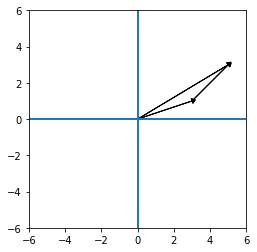

In [35]:
print('3+1j + 2+2j =', 3+1j + 2+2j)
plot_arrow(3+1j, 0+0j, show=False)
plot_arrow(2+2j, 3+1j, show=False)
plot_arrow(3+1j + 2+2j, 0+0j, 6)

-1+2j + 1-1j = 1j


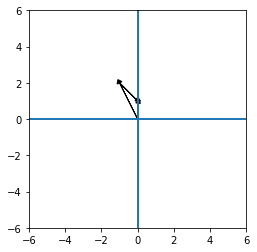

In [36]:
print('-1+2j + 1-1j =', -1+2j + 1-1j)
plot_arrow(-1+2j, 0+0j, show=False)
plot_arrow(1-1j, -1+2j, show=False)
plot_arrow(-1+2j + 1-1j, 0+0j, 6)

-1+2j + -3+0.001j = (-4+2.001j)


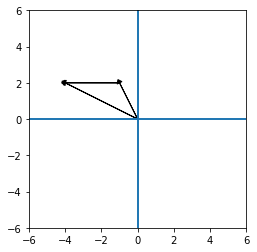

In [37]:
print('-1+2j + -3+0.001j =', -1+2j + -3+0.001j)
plot_arrow(-1+2j, 0+0j, show=False)
plot_arrow(-3+0.001j, -1+2j, show=False)
plot_arrow(-1+2j + -3+0.001j, 0+0j, 6)

4*(0+2j) + 0.001+1j = (0.001+9j)


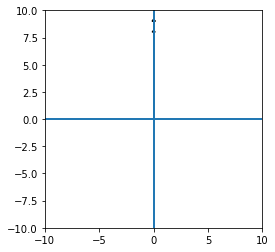

In [39]:
print('4*(0+2j) + 0.001+1j =', 4*(0+2j) + 0.001+1j)
plot_arrow(4*(0+2j), 0+0j, show=False)
plot_arrow(0.001+1j, 4*(0+2j), show=False)
plot_arrow(4*(0+2j) + 0.001+1j, 0+0j, 10)

### Problem 2.7.11
지수의 첫 번째 법칙을 사용하여(섹션 2.4.9) 두 지수의 곱을 하나의 지수로 표현해 보자.

- a. $\quad e^{li}e^{2i} = e^{3i}$
- b. $\quad e^{(\pi/4)i}e^{(2\pi/3)i} = e^{(11/12\pi)i}$
- c. $\quad e^{-(\pi/4)i}e^{(2\pi/3)i} = e^{(5/12\pi)i}$

### Problem 2.7.12
다음 스펙을 가지는 프로시저, transform(a, b, L)을 작성해 보자.
- input: 복소수 a와 b, 복소수들의 리스트 L
- output: f(z)=az+b를 L내의 각 복소수에 적용하여 얻은 복소수들의 리스트

다음의 각 문제 명신된 변환을 이루기 위해 a와 b값으로 어떤 값을 선택해야하는지 설명해 보자. 만일 명시된 변환을 이룰 방법이 없으면, 그 이유를 설명해 보자.

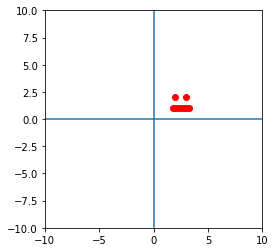

In [54]:
def transform(a, b, L): return [a*z + b for z in S]

plot(transform(1, 0, S), scale=10)

- a. z를 위도 1유닛, 오른쪽으로 1유닛 평행이동하고, 다음에 시계 방향으로 90도 회전한 후 2만큼 스케일링해 보자.
 - A) 없다. 평행이동부터 적용은 불가능하다. 만약 두 번 연산이 가능하다면 평행이동*(a=1+1j)* 후 스케일 연산*(-2j)*을 하면 된다.

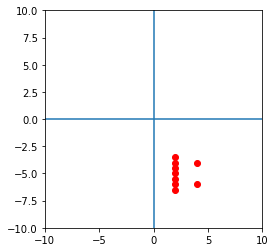

In [58]:
plot(transform(-2j, 0, (transform(1, 1+1j, S))), scale=10)

- b. 실수부를 2만큼, 허수부를 3만큼 스케일링하고, 반시계 방향으로 45도 회전한 후, 아래로 2 유닛, 왼쪽으로 3 유닉 평행이동해 보자.
 - A) 없다. 실수보와 허수부를 각각 개별적으로 스케일링이 불가능하다. 

### Problem 2.7.13
다음의 각 문제에 대해 GF(2) 연산의 결과를 계산해 보자.

- a. $\quad 1+1+1+0=0+1=1$
- b. $\quad 1\cdot1+0\cdot1+0\cdot0+1\cdot1 = 1+0+0+1=0$
- c. $\quad (1+1+1)\cdot(1+1+1+1) = 1\cdot 0 = 0$

### Problem 2.7.14
섹션 2.5.2에서 사용된 네트워크 예를 생각해 보자. 주어진 순간에 전송되어야 할 비트느 $b_1=1, b_2=1$이다. 네트워크의 각 링크를 그 링크를 통해 전송되어야 비트를 가지고 표시해 보자. 이때, 비트는 네트워크 코딩 기법에 따라 전송된다. 사용자 노드 c와 d는 어떻게 $b_1, b_2$를 수신할 수 있는지 설명해 보자.

A)
1. 교차점에서 $b_1+b_2=0$으로 즉, 0이 c,d에 전달되고 각각 $b_1=1, b_2=1$가 전달된다.
2. c는 $b_1=1, b_2=0-b_1=1$, d는 $b_2=1, b_1=0-b_2=1$로 수신할 수 있다. 
